# Project Group - 22

Members: Charlotte Koning, Cleo Vos, Koen Awater, Jasmijn van de Kar, Jippo Steenstra

Student numbers: 5414164, 5324599, 5416493, 5315611, 5064740

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

Main Research Question:

To what extent can anomalous peaks in pedestrian flow be predicted up to 15 minutes in advance using historical sensor data and temporal features?

Sub questions:
1.	How can anomalous crowd behaviour be quantitatively defined within the dataset?
2.	Which sensor locations show the highest likelihood of anomalies?
3.	How accurately can different models (e.g., Logistic Regression, Random Forest, XGBoost) predict anomalies?
4.	Which features (temporal, spatial, or meteorological) contribute most to prediction accuracy?

# Contribution Statement

Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

We will use the dataset(s) about the SAIL event, provided by the professors.

# Data Pipeline

For the geographical scale we will use eastern harbor of Amsterdam IJhaven, across the IJ river. The temporal scale of the project will be the 20-24 august 2025. For data preperation we will use the Panda library in python.

In [23]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import chardet
import os
import matplotlib.pyplot as plt
import calendar

In [24]:
flow_file = 'SAIL2025_LVMA_data_3min_20August-25August2025_flow.csv'
location_file = 'sensor-location.xlsx'

with open(flow_file, 'rb') as f:
    result = chardet.detect(f.read())

enc = result['encoding']

df_flow = pd.read_csv(flow_file, encoding=enc)


with open(location_file, 'rb') as f:
    result = chardet.detect(f.read())


df_location = pd.read_excel(location_file)

In [54]:
df_flow.head(3)
df_location

,Objectummer,Locatienaam,Lat/Long,Breedte,Effectieve breedte
0,CMSA-GAKH-01,Kalverstraat t.h.v. 1,"52.372634, 4.892071",8,"6,7"
1,CMSA-GAWW-11,Korte Niezel,"52.374616, 4.899830","3,8","3,4"
2,CMSA-GAWW-12,Oudekennissteeg,"52.373860, 4.898690",3,"2,6"
3,CMSA-GAWW-13,Stoofsteeg,"52.372439, 4.897689","2,6","2,2"
4,CMSA-GAWW-14,Oudezijds Voorburgwal t.h.v. 91,"52.373538, 4.898166",4,"3,6"
5,CMSA-GAWW-15,Oudezijds Achterburgwal t.h.v. 86,"52.372916, 4.898207","3,2","2,8"
6,CMSA-GAWW-16,Oudezijds Achterburgwal t.h.v. 91,"52.372628, 4.898233","3,1","2,7"
7,CMSA-GAWW-17,Oudezijds Voorburgwal t.h.v. 206,"52.372782, 4.896649","5,1","4,7"
8,CMSA-GAWW-19,Molensteeg,"52.373587, 4.899815","2,9","2,5"
9,CMSA-GAWW-20,Oudebrugsteeg,"52.375350, 4.897480","5,7","5,3"


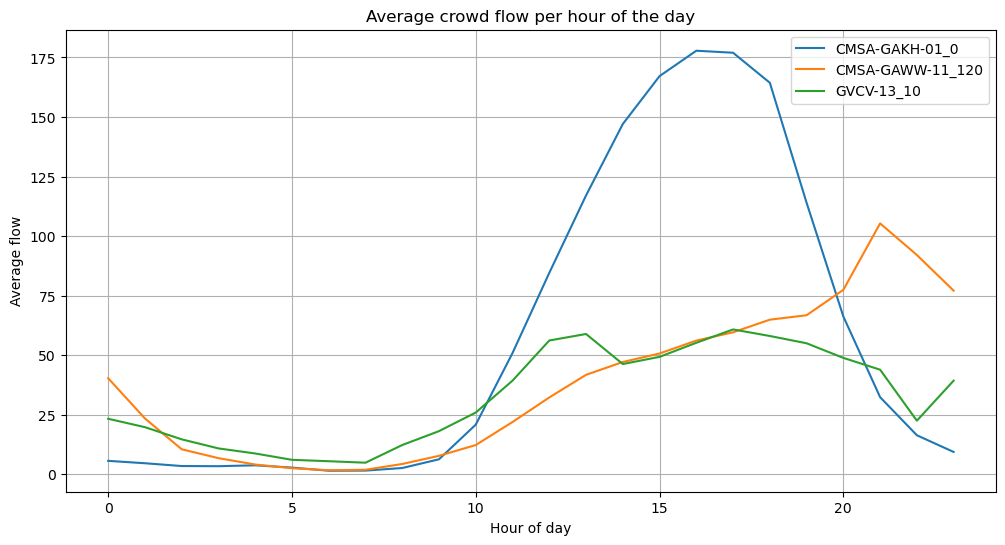

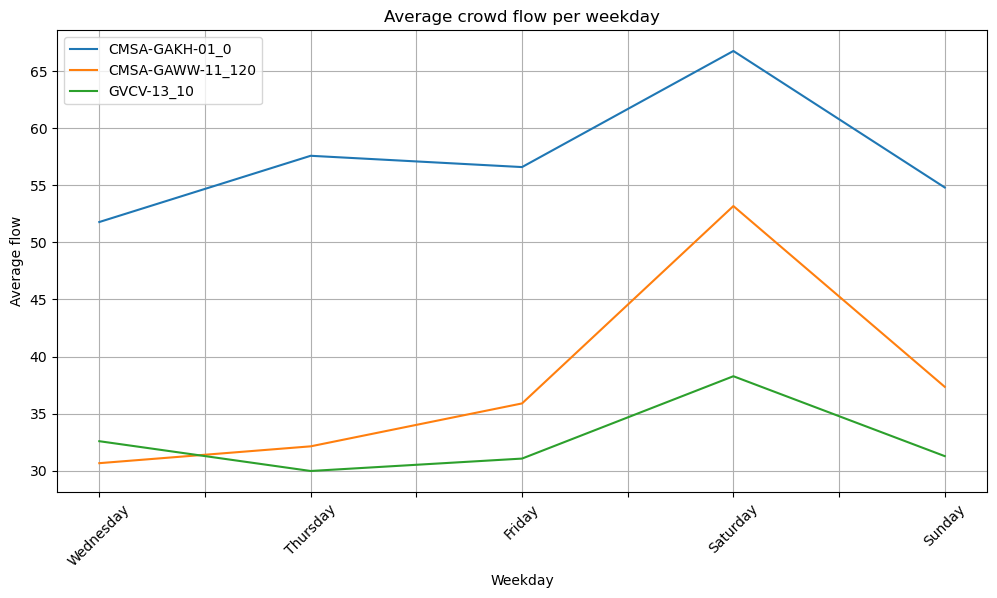

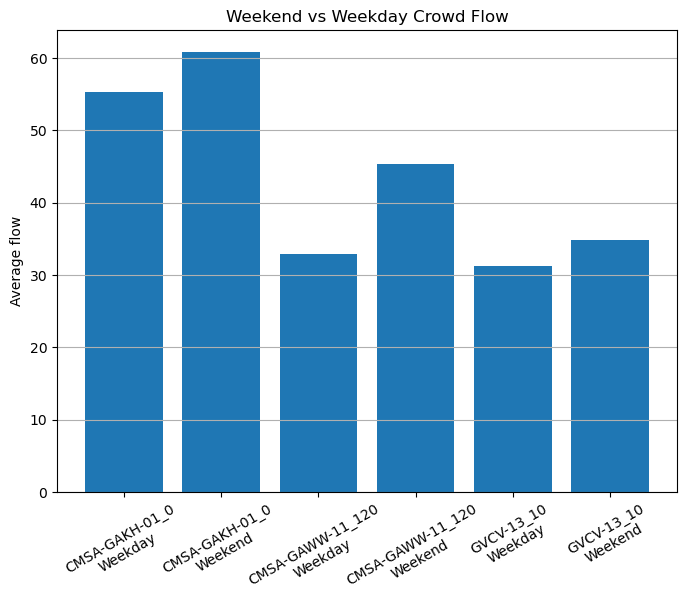

In [26]:
sensors = ["CMSA-GAKH-01_0", "CMSA-GAWW-11_120", "GVCV-13_10"]

# 1. Hourly plot (unchanged)
plt.figure(figsize=(12, 6))
for sensor in sensors:
    df_flow.groupby("hour")[sensor].mean().plot(label=sensor)
plt.title("Average crowd flow per hour of the day")
plt.xlabel("Hour of day")
plt.ylabel("Average flow")
plt.legend()
plt.grid(True)
plt.show()

# 2. Weekday plot with names instead of numbers
# Create mapping: 0 = Monday, 6 = Sunday
weekday_names = [calendar.day_name[i] for i in range(7)]

plt.figure(figsize=(12, 6))
for sensor in sensors:
    weekday_means = df_flow.groupby("weekday")[sensor].mean()
    weekday_means.index = [weekday_names[i] for i in weekday_means.index]
    weekday_means.plot(label=sensor)

plt.title("Average crowd flow per weekday")
plt.xlabel("Weekday")
plt.ylabel("Average flow")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 3. Weekend vs Weekday bar plot
plt.figure(figsize=(8, 6))
means = []
labels = []
for sensor in sensors:
    weekend_mean = df_flow[df_flow["is_weekend"] == 1][sensor].mean()
    weekday_mean = df_flow[df_flow["is_weekend"] == 0][sensor].mean()
    means.extend([weekday_mean, weekend_mean])
    labels.extend([f"{sensor}\nWeekday", f"{sensor}\nWeekend"])

plt.bar(labels, means)
plt.title("Weekend vs Weekday Crowd Flow")
plt.ylabel("Average flow")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()


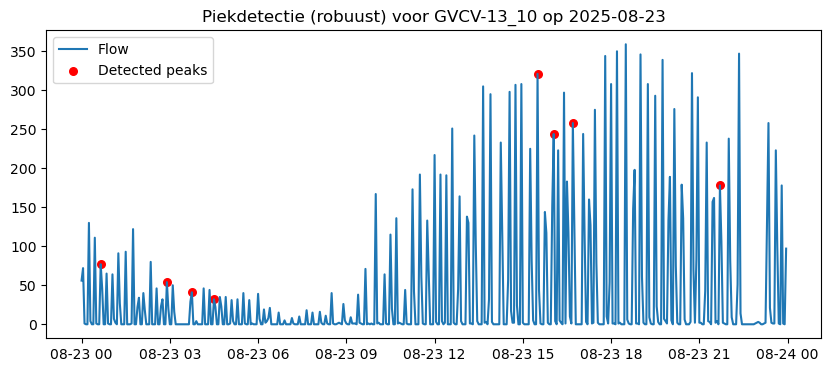

In [27]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

sensor = "GVCV-13_10"  # of een van je andere twee

data = df[["timestamp", sensor]].copy()
y = data[sensor].astype(float)

# 1) Robuuste baseline + residu (voorkomt dat elke bult een piek wordt)
baseline = y.rolling(5, center=True, min_periods=1).median()   # ~15 min gladstrijken (3-min data)
resid = y - baseline

# 2) Robuuste schaal (MAD) voor drempels
mad = 1.4826 * np.median(np.abs(resid - np.median(resid)))
mad = max(mad, 1.0)  # ondergrens zodat niet te klein

# 3) Piekdetectie met strengere parameters
# - prominence: minstens 3×MAD boven lokale omgeving
# - distance: minimaal 6 samples (≈18 min) tussen pieken
# - width: piek moet minimaal ~2 samples breed zijn
peaks, props = find_peaks(
    resid.values,
    prominence=3*mad,
    distance=6,
    width=1.5
)

# 4) Extra filter: absolute hoogte moet ook boven baseline + drempel
abs_filter = y.iloc[peaks].values > (baseline.iloc[peaks].values + max(15, 2*mad))
peaks = peaks[abs_filter]

# Plotten in een kort venster (bijv. 1 dag)
day = pd.Timestamp("2025-08-23").date()
mask = data["timestamp"].dt.date == day

plt.figure(figsize=(10,4))
plt.plot(data.loc[mask, "timestamp"], y[mask], label="Flow")
sel = mask.to_numpy().nonzero()[0]
show_idx = np.intersect1d(np.where(mask)[0], peaks)
plt.scatter(data.iloc[show_idx]["timestamp"], y.iloc[show_idx],
            s=30, color="red", label="Detected peaks")
plt.title(f"Piekdetectie (robuust) voor {sensor} op {day}")
plt.legend()
plt.show()

In [28]:
df_long = df_flow.melt(id_vars=["timestamp"], var_name="sensor_id", value_name="flow")

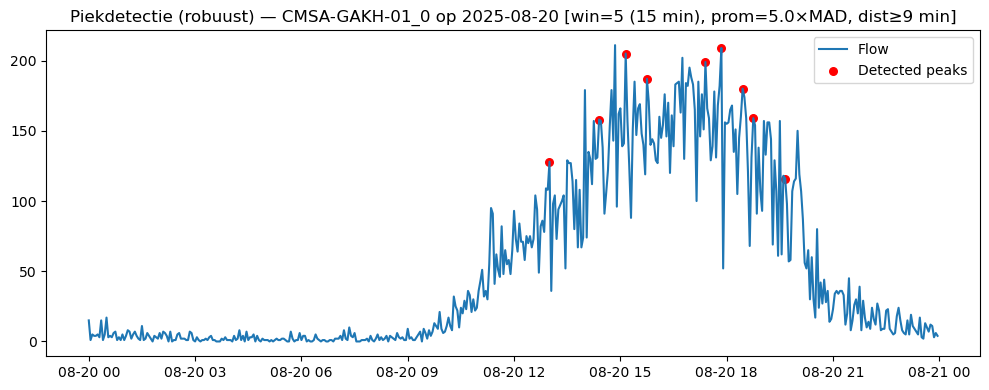

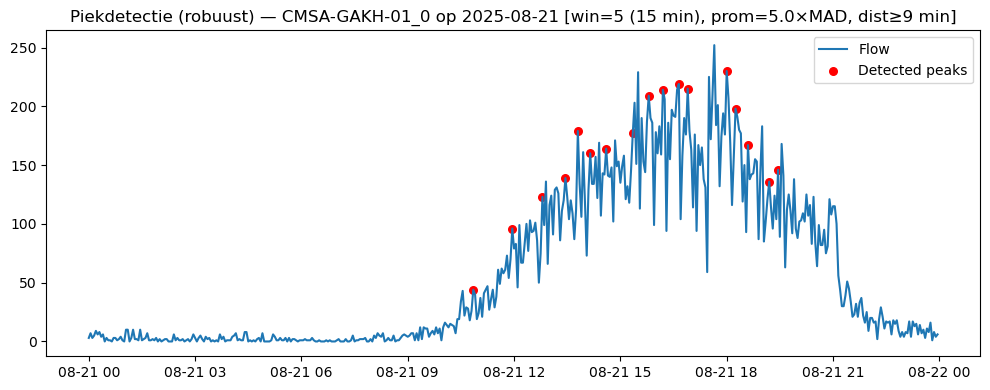

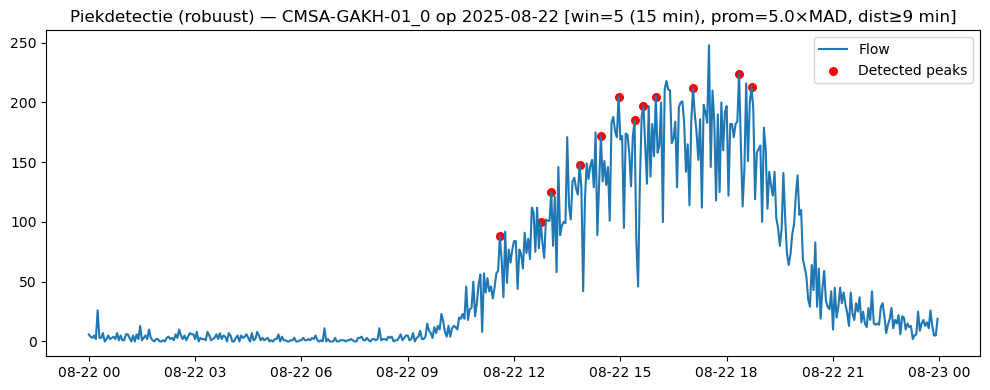

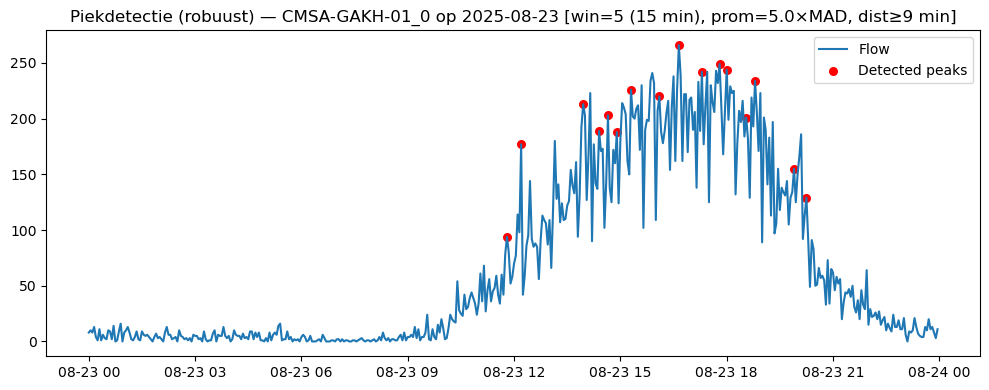

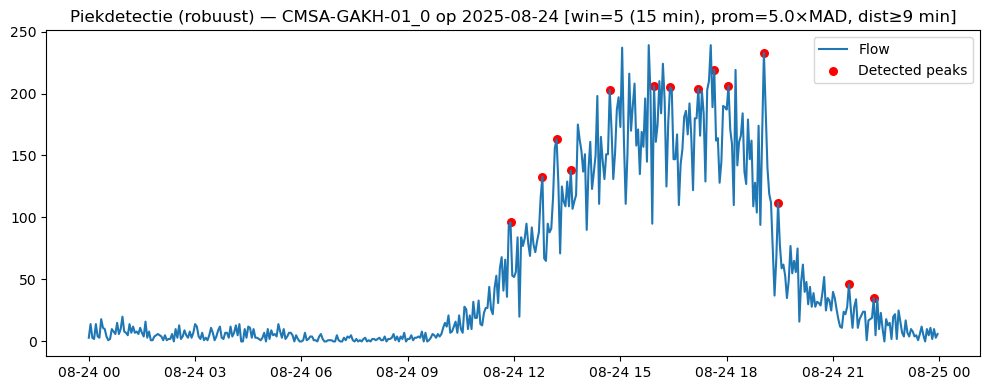

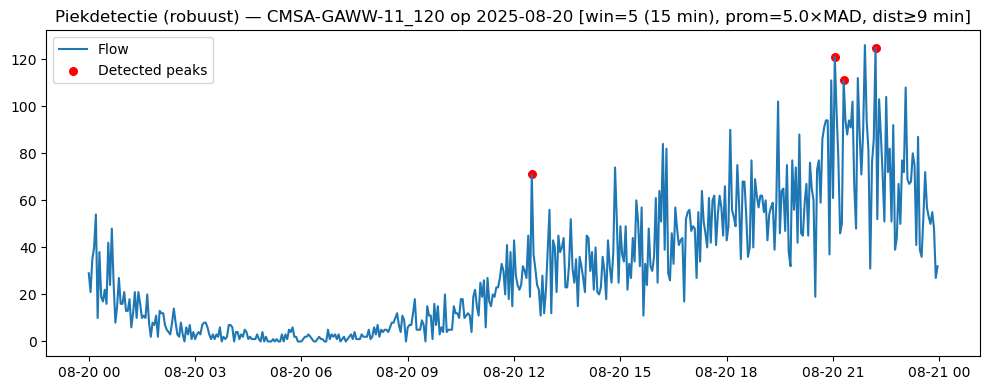

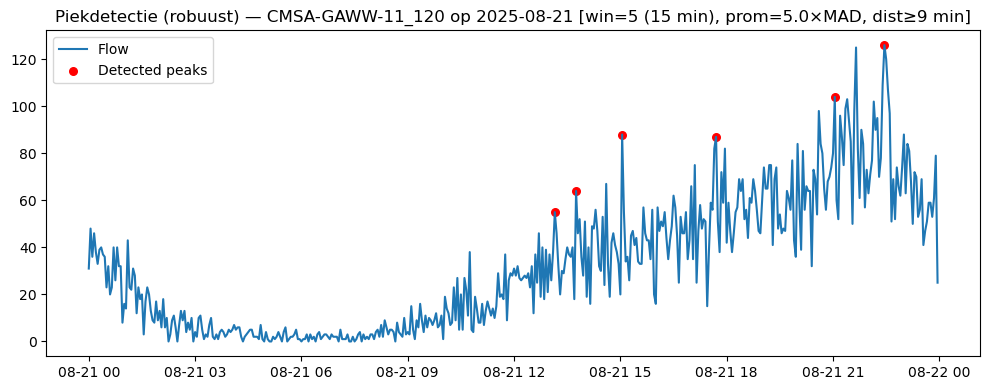

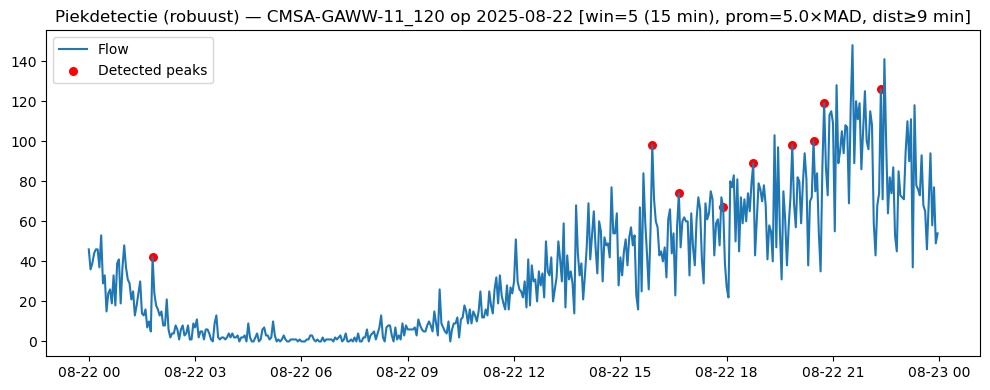

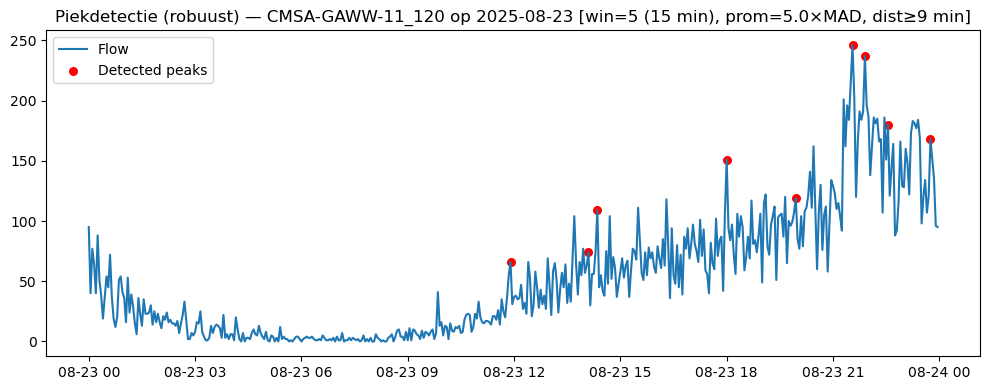

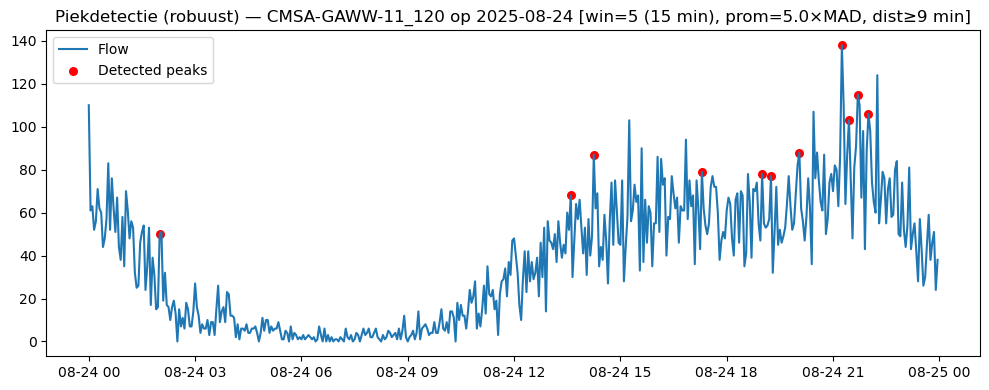

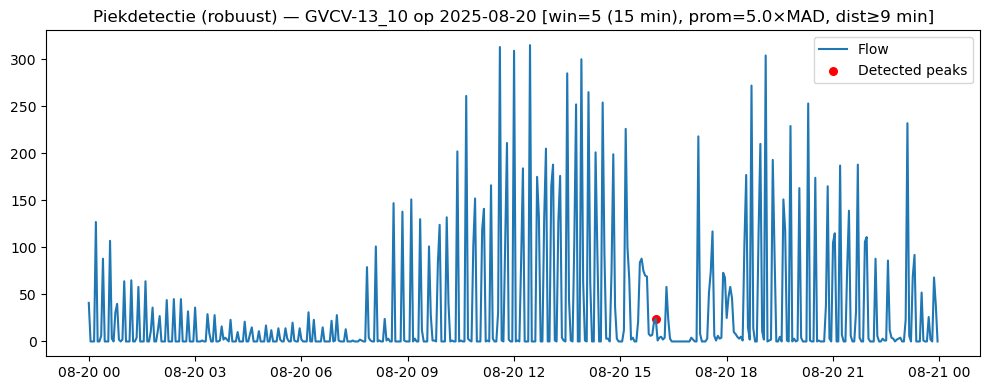

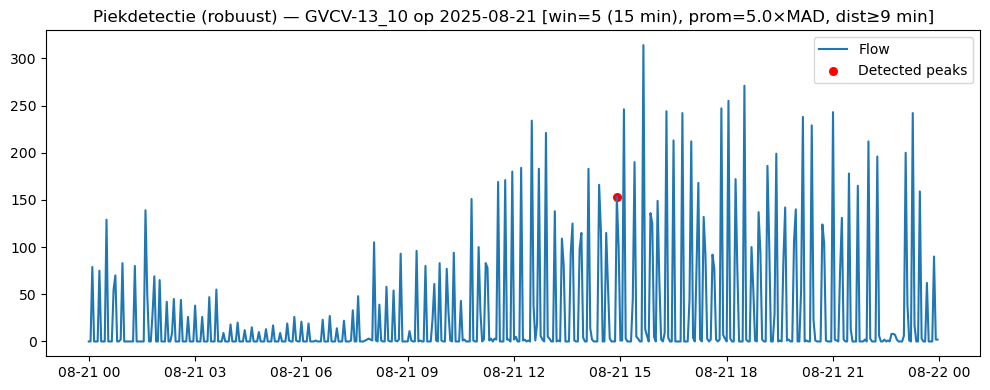

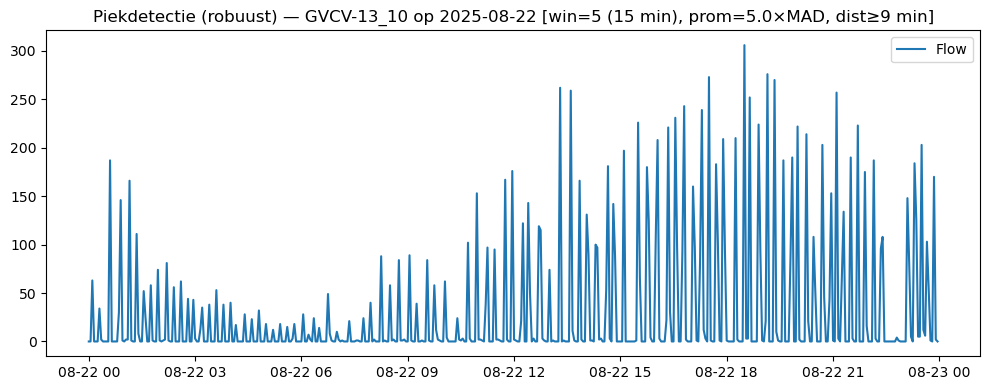

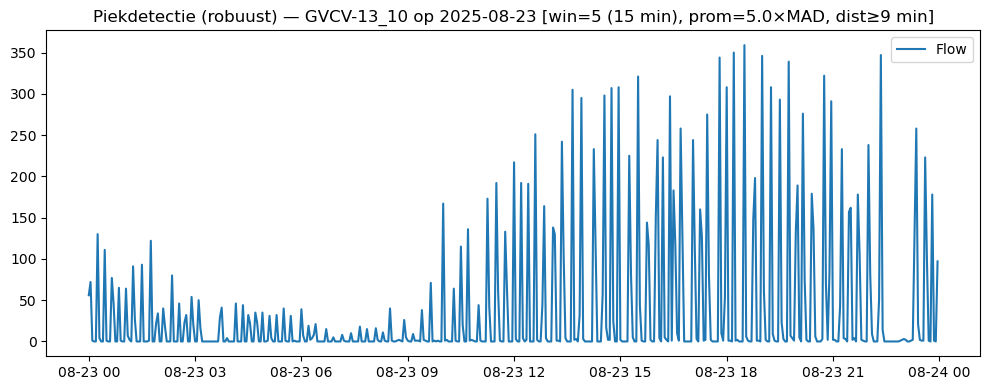

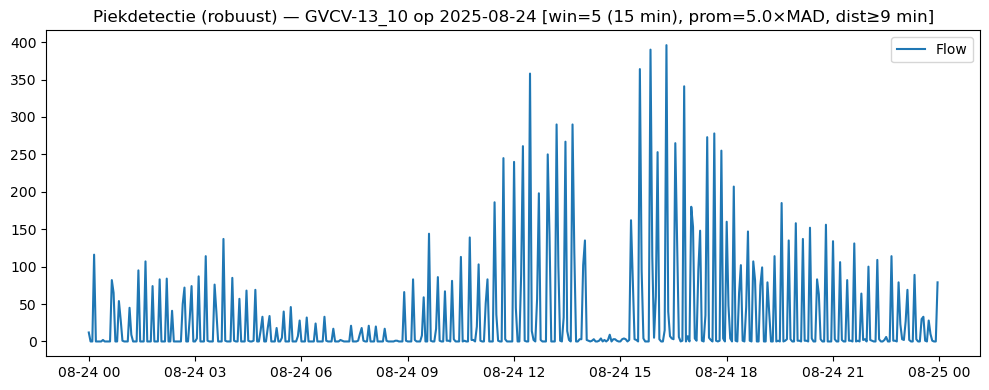

In [53]:
# === Kies je 3 sensoren hier ===
SENSORS = ["CMSA-GAKH-01_0", "CMSA-GAWW-11_120", "GVCV-13_10"]

# Zorg dat timestamp goed staat
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

# === TUNEBARE PARAMS ===
SAMPLE_MIN   = 3          # 3-min data
SMOOTH_WIN   = 5          # rolling-median venster (5*3 = 15 min)
PROM_MAD     = 5.0        # piek-prominence drempel = PROM_MAD * MAD
MIN_DIST     = 3          # minimale afstand tussen pieken in samples (6*3 = 18 min)
MIN_WIDTH    = 2          # minimale piekbreedte in samples
ABS_FLOOR    = 15         # absolute extra drempel boven baseline
ABS_MAD_MULT = 2.0        # extra MAD-drempel boven baseline

def robust_peaks(y: pd.Series):
    # 1) robuuste baseline en residu
    baseline = y.rolling(SMOOTH_WIN, center=True, min_periods=1).median()
    resid = y - baseline

    # 2) MAD (robuuste schaal)
    mad = 1.4826 * np.median(np.abs(resid - np.median(resid)))
    mad = max(mad, 1.0)  # ondergrens

    # 3) detecteer pieken op residu
    peaks, props = find_peaks(
        resid.values,
        prominence=PROM_MAD * mad,
        distance=MIN_DIST,
        width=MIN_WIDTH
    )

    # 4) extra absolute hoogtecheck
    keep = y.iloc[peaks].values > (baseline.iloc[peaks].values + max(ABS_FLOOR, ABS_MAD_MULT*mad))
    peaks = peaks[keep]
    return peaks, baseline, resid, mad

# === Plot per sensor en per dag ===
all_days = df["timestamp"].dt.date.unique()

for sensor in SENSORS:
    y = df[sensor].astype(float)
    peaks, baseline, resid, mad = robust_peaks(y)

    # precompute tijdindex → snel filteren per dag
    peak_idx = set(peaks.tolist())

    for day in all_days:
        mask = df["timestamp"].dt.date == day
        if not mask.any():
            continue

        idx = np.where(mask)[0]
        day_peaks_idx = sorted(list(set(idx).intersection(peak_idx)))

        plt.figure(figsize=(10,4))
        plt.plot(df.loc[mask, "timestamp"], y[mask], label="Flow")
        if day_peaks_idx:
            plt.scatter(df.iloc[day_peaks_idx]["timestamp"], y.iloc[day_peaks_idx],
                        s=30, color="red", label="Detected peaks")
        plt.title(f"Piekdetectie (robuust) — {sensor} op {day} "
                  f"[win={SMOOTH_WIN} ({SMOOTH_WIN*SAMPLE_MIN} min), "
                  f"prom={PROM_MAD}×MAD, dist≥{MIN_DIST*SAMPLE_MIN} min]")
        plt.legend()
        plt.tight_layout()
        plt.show()

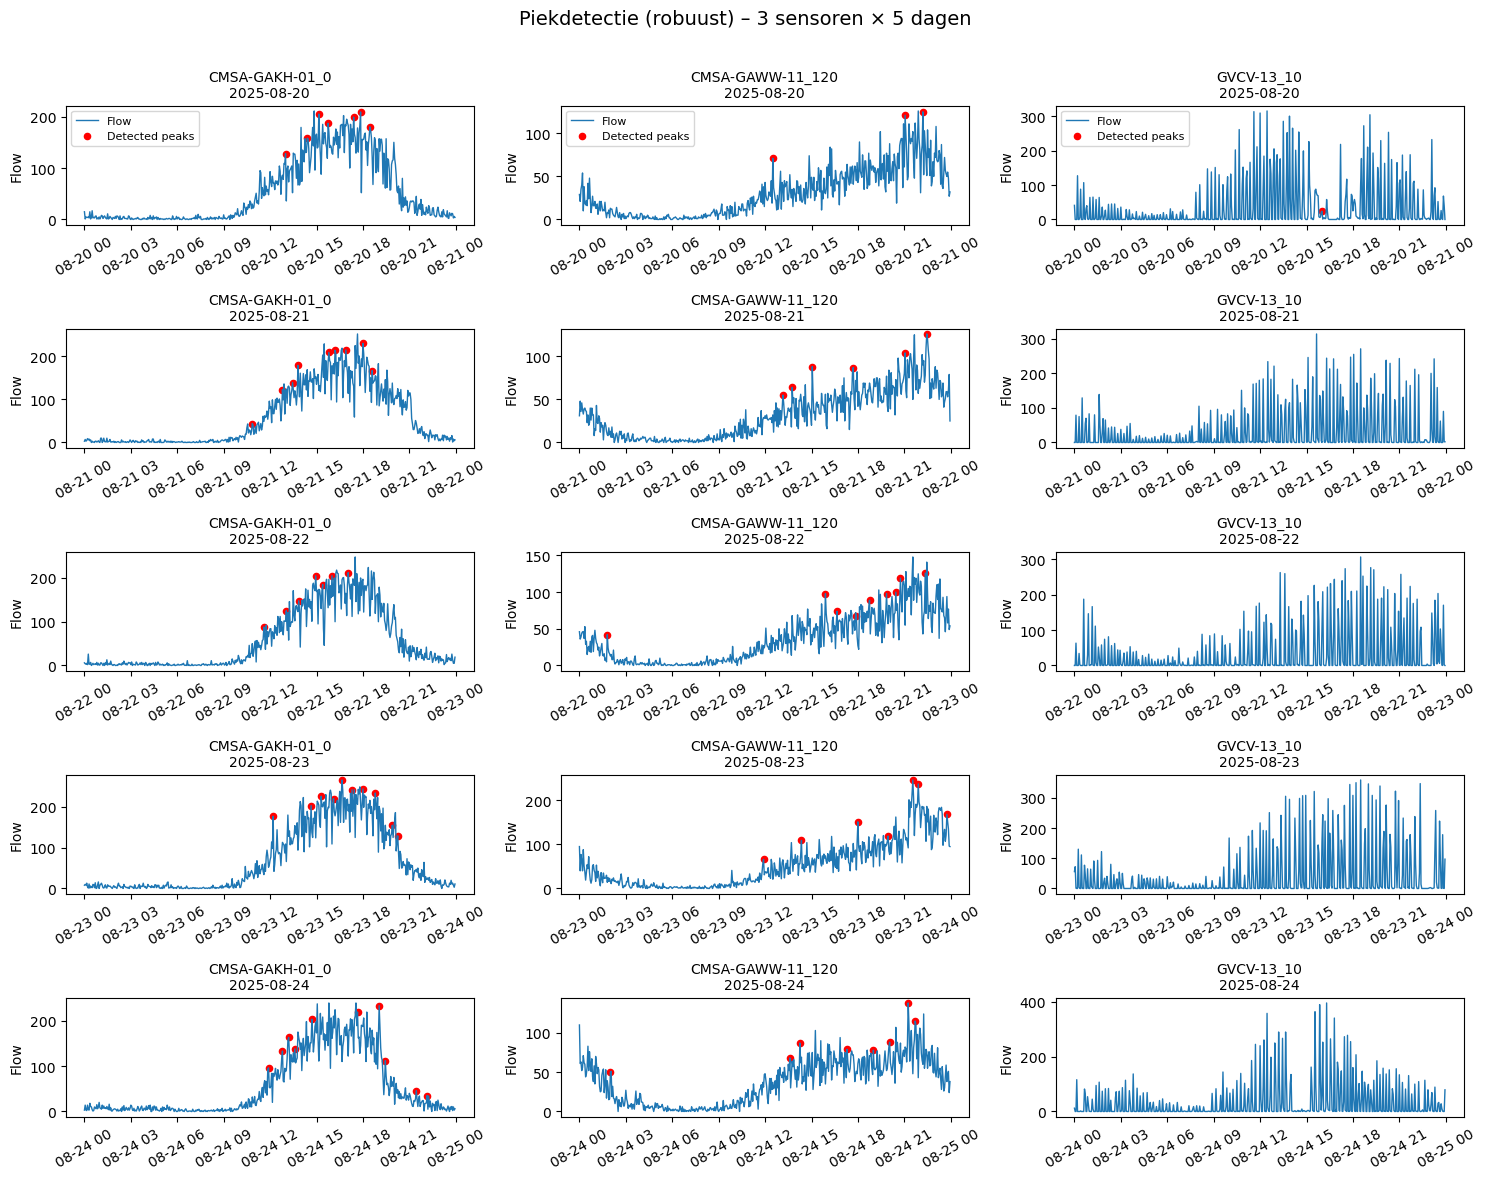

In [52]:
# === Kies je 3 sensoren ===
SENSORS = ["CMSA-GAKH-01_0", "CMSA-GAWW-11_120", "GVCV-13_10"]

# Data voorbereiden
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

# === Instellingen voor piekdetectie ===
SAMPLE_MIN   = 3
SMOOTH_WIN   = 5
PROM_MAD     = 3.0
MIN_DIST     = 6
MIN_WIDTH    = 2
ABS_FLOOR    = 15
ABS_MAD_MULT = 2.0

def robust_peaks(y: pd.Series):
    baseline = y.rolling(SMOOTH_WIN, center=True, min_periods=1).median()
    resid = y - baseline
    mad = 1.4826 * np.median(np.abs(resid - np.median(resid)))
    mad = max(mad, 1.0)
    peaks, props = find_peaks(
        resid.values,
        prominence=PROM_MAD * mad,
        distance=MIN_DIST,
        width=MIN_WIDTH
    )
    keep = y.iloc[peaks].values > (baseline.iloc[peaks].values + max(ABS_FLOOR, ABS_MAD_MULT*mad))
    peaks = peaks[keep]
    return peaks

# === Dagen selecteren ===
days = sorted(df["timestamp"].dt.date.unique())[:5]  # eerste 5 dagen (20-24 aug)

# === Plot: 5 rijen (dagen) × 3 kolommen (sensoren) ===
fig, axes = plt.subplots(len(days), len(SENSORS), figsize=(15, 12), sharex=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, day in enumerate(days):
    mask_day = df["timestamp"].dt.date == day

    for j, sensor in enumerate(SENSORS):
        ax = axes[i, j]
        y = df[sensor].astype(float)
        peaks = robust_peaks(y)

        idx_day = np.where(mask_day)[0]
        day_peaks_idx = sorted(set(idx_day).intersection(peaks))

        ax.plot(df.loc[mask_day, "timestamp"], y[mask_day], label="Flow", lw=1)
        if day_peaks_idx:
            ax.scatter(df.iloc[day_peaks_idx]["timestamp"], y.iloc[day_peaks_idx],
                       s=20, color="red", label="Detected peaks")
        ax.set_title(f"{sensor}\n{day}", fontsize=10)
        ax.set_ylabel("Flow")
        ax.tick_params(axis='x', rotation=30)
        if i == 0:
            ax.legend(fontsize=8)

plt.suptitle("Piekdetectie (robuust) – 3 sensoren × 5 dagen", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [45]:
def detect_peaks(y):
    peaks, _ = find_peaks(y, prominence=10, distance=5)
    is_peak = np.zeros(len(y))
    is_peak[peaks] = 1
    return is_peak

df_long["is_peak_now"] = df_long.groupby("sensor_id")["flow"].transform(detect_peaks)

# Label: piek binnen 15 min (5 stappen vooruit)
H = 5  # 5×3 min = 15 min
df_long["is_peak_future"] = (
    df_long.groupby("sensor_id")["is_peak_now"]
           .transform(lambda s: s.shift(-1).rolling(H).max())
           .fillna(0)
)

In [46]:
# Zorg dat timestamp echt datetime is (met tijdzone)
df_long["timestamp"] = pd.to_datetime(df_long["timestamp"], errors="coerce", utc=True)

# (optioneel) naar lokale tijd
df_long["timestamp_local"] = df_long["timestamp"].dt.tz_convert("Europe/Amsterdam")

df_long["rolling_mean_5"] = (
    df_long.groupby("sensor_id")["flow"].transform(lambda s: s.rolling(5, min_periods=1).mean())
)
df_long["rolling_std_5"] = (
    df_long.groupby("sensor_id")["flow"].transform(lambda s: s.rolling(5, min_periods=1).std())
)
df_long["diff_1"] = df_long.groupby("sensor_id")["flow"].diff()
df_long["diff_3"] = df_long.groupby("sensor_id")["flow"].diff(3)
df_long["trend"] = df_long["diff_1"].rolling(3, min_periods=1).mean()
df_long["hour"] = df_long["timestamp"].dt.hour
df_long["weekday"] = df_long["timestamp"].dt.weekday

In [47]:
from sklearn.model_selection import train_test_split

features = ["rolling_mean_5", "rolling_std_5", "diff_1", "diff_3", "trend", "hour", "weekday"]
X = df_long[features].fillna(0)
y = df_long["is_peak_future"]

# 80% eerste deel = train, laatste 20% = test (chronologisch)
split_idx = int(len(df_long) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89     27892
         1.0       0.69      0.82      0.75     10508

    accuracy                           0.85     38400
   macro avg       0.81      0.84      0.82     38400
weighted avg       0.86      0.85      0.86     38400



In [50]:
# Lead time voorbeeld
predicted = df_long.iloc[split_idx:].copy()
predicted["pred"] = y_pred

lead_times = []
for i, row in predicted.iterrows():
    if row["pred"] == 1:
        # zoek eerstvolgende echte piek
        next_peak = predicted.iloc[i:i+H*2]["is_peak_now"].idxmax()
        lead_times.append(next_peak - i)

print("Gemiddelde lead time (in stappen van 3 min):", np.mean(lead_times))

ValueError: attempt to get argmax of an empty sequence